In [408]:
import scipy.io as sio
import matplotlib.pyplot as plt
import numpy as np

from pandas import read_csv
import pandas as pd
import statsmodels.api as sm
from statsmodels.tsa.arima_model import ARIMA
from math import sqrt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf


In [409]:
enf = sio.loadmat('./enf-add-final/ENFs_KDD.mat')
value = enf['ENFs']
name = []
data = []
for i in range(60):
    lo = ''.join(value[i][0])
    da = np.reshape(value[i][1],(600,1))
    s = lo.split('/')[-1]
    p = s.split('_')[1]
    name.append(p)
    data.append(da)
data=np.array(data)
val = data.reshape(60,600)

In [410]:
ar = []
ma = []
for i in range(60):
    re = ARIMA(val[i], order=[1,0,1])
    re_fit = re.fit()
    r_ar = re_fit.arparams
    r_ma = re_fit.maparams
    ar.append(r_ar)
    ma.append(r_ma)
print(ar)
print(ma)

[array([0.89660172]), array([-0.16655433]), array([0.15332664]), array([0.80365086]), array([0.9222293]), array([0.00299373]), array([0.90943671]), array([0.9274681]), array([0.29552505]), array([0.88757355]), array([0.93667145]), array([0.88473413]), array([0.94152022]), array([0.91694996]), array([0.91766853]), array([0.91108294]), array([0.88660878]), array([0.90879009]), array([0.90765812]), array([0.88416782]), array([0.08171573]), array([-0.06427174]), array([0.9174074]), array([0.92007219]), array([0.93079865]), array([0.92049442]), array([0.92089175]), array([0.8808773]), array([0.88086089]), array([0.90758502]), array([0.7649698]), array([0.92783027]), array([0.92655932]), array([0.91412908]), array([0.20953395]), array([0.92086278]), array([0.90458223]), array([0.81176645]), array([0.91826255]), array([0.80564666]), array([0.84774501]), array([0.77149495]), array([0.83255795]), array([0.8129596]), array([0.82237379]), array([0.82044744]), array([0.83791331]), array([0.8178655

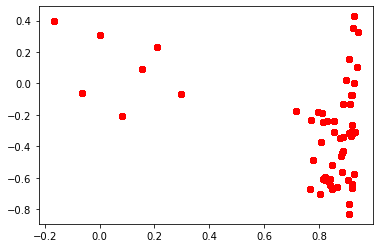

In [117]:
for i in range(60):
    plt.scatter(ar,ma, s = 30, c = 'r')

In [119]:
print(name)

['arizona', 'california', 'california', 'california', 'california', 'california', 'california', 'colorado', 'colorado', 'dc', 'florida', 'florida', 'florida', 'florida', 'florida', 'florida', 'hawaii', 'hawaii', 'illinois', 'illinois', 'illinois', 'illinois', 'louisiana', 'louisiana', 'louisiana', 'louisiana', 'louisiana', 'maryland', 'maryland', 'michigan', 'michigan', 'michigan', 'nebraska', 'nevada', 'newjersey', 'newjersey', 'newjersey', 'newmexico', 'newmexico', 'newyork', 'newyork', 'newyork', 'newyork', 'newyork', 'newyork', 'newyork', 'newyork', 'newyork', 'newyork', 'newyork', 'newyork', 'newyork', 'northcarolina', 'northdakota', 'pennsylvania', 'pennsylvania', 'pennsylvania', 'pennsylvania', 'pennsylvania', 'pennsylvania']
hawaii


In [134]:
print(name[33])

nevada


In [286]:
west = np.vstack([val[0],val[7],val[8],val[9],val[33],val[37],val[38]])
east = np.vstack([val[1],val[2],val[3],val[4],val[5],val[6],val[10],val[11],val[12],val[13],val[14],val[15],val[18],val[19],val[20],val[21],val[22],val[23],val[24],val[25],val[26],val[27],val[28],val[29],val[30],val[31],val[32],val[34],val[35],val[36],val[39],val[40],val[41],val[42],val[43],val[44],val[45],val[46],val[47],val[48],val[49],val[50],val[51],val[52],val[53],val[54],val[55],val[56],val[57],val[58],val[59]])
hawa = np.vstack([val[16],val[17]])

(600, 7)


In [293]:
test= val[16]+val[17]
test2 = np.vstack([val[16],val[17]])
test3 = test2.flatten()
print(test)
print(test2.shape)
print(test3.shape)

[120.20446777 120.08764648 120.08557129 120.19091797 120.18481445
 119.97790527 120.28613281 120.28564453 120.19494629 120.19702148
 120.19702148 120.20007324 120.18103027 120.20178223 120.1965332
 120.16674805 120.17113615 120.17350012 120.17415104 120.19883908
 120.18798828 120.20147895 120.20052497 120.20776367 120.18762207
 120.19123286 120.19458008 120.18469238 120.20288086 120.21179199
 120.19970703 120.19482422 120.21411133 120.22180176 120.18371582
 120.18725586 120.18481445 120.15661621 120.15836374 120.18225098
 120.15905322 120.16371736 120.1776123  120.18127441 120.15655487
 120.16743517 120.17895508 120.19628906 120.16329322 120.18390189
 120.21118164 120.18786621 120.18979588 120.1940918  120.18103027
 120.17236328 120.18041992 120.17053223 120.17932129 120.19506836
 120.17114258 120.16589355 120.14985095 120.13002145 120.13275927
 120.19616699 120.12953124 120.16638184 120.10798339 120.1150609
 120.12088544 120.12784534 120.1545513  120.15882986 120.14305433
 120.1284630

In [411]:
western = np.vstack([val[0],val[7],val[8],val[9],val[33],val[37],val[38]])
west = western.flatten()
n = len(west)
m = int(n/10)
war = []
wma = []
for i in range(10):
    data = west[:m]
    re = ARIMA(data, order=[1,0,1])
    re_fit = re.fit()
    r_ar = re_fit.arparams
    r_ma = re_fit.maparams
    war.append(r_ar)
    wma.append(r_ma)
    west = west[m:]
print(war)
print(wma)

[array([0.91072936]), array([0.89683567]), array([0.97614357]), array([0.29038562]), array([0.90670362]), array([0.98532466]), array([0.9088204]), array([0.79758092]), array([0.90790047]), array([0.87453251])]
[array([0.00788302]), array([0.1937193]), array([0.05000453]), array([-0.04079165]), array([-0.33909525]), array([-0.62706589]), array([-0.35163868]), array([-0.24365521]), array([-0.48622272]), array([-0.57095757])]


In [412]:
eastern = val[1]+val[2]+val[3]+val[4]+val[5]+val[6]+val[10]+val[11]+val[12]+val[13]+val[14]+val[15]+val[18]+val[19]+val[20]+val[21]+val[22]+val[23]+val[24]+val[25]+val[26]+val[27]+val[28]+val[29]+val[30]+val[31]+val[32]+val[34]+val[35]+val[36]+val[39]+val[40]+val[41]+val[42]+val[43]+val[44]+val[45]+val[46]+val[47]+val[48]+val[49]+val[50]+val[51]+val[52]+val[53]+val[54]+val[55]+val[56]+val[57]+val[58]+val[59]
east = eastern.flatten()
n = len(east)
m = int(n/10)
ear = []
ema = []
for i in range(10):
    data = east[:m]
    re = ARIMA(data, order=[0,0,2])
    re_fit = re.fit()
    r_ar = re_fit.arparams
    r_ma = re_fit.maparams
    ear.append(r_ar)
    ema.append(r_ma)
    east = east[m:]
print(ear)
print(ema)

[array([], dtype=float64), array([], dtype=float64), array([], dtype=float64), array([], dtype=float64), array([], dtype=float64), array([], dtype=float64), array([], dtype=float64), array([], dtype=float64), array([], dtype=float64), array([], dtype=float64)]
[array([0.57178763, 0.58116828]), array([0.95381294, 0.5290208 ]), array([1.00502684, 0.36758563]), array([0.85770026, 0.4342431 ]), array([0.65020978, 0.28110247]), array([0.57493375, 0.29963999]), array([0.75424147, 0.64404182]), array([0.92622977, 0.32724366]), array([0.74178655, 0.34114779]), array([0.29403898, 0.50214361])]


In [413]:
hawaii = val[16]+val[17]
hawa = hawaii.flatten()
n = len(hawa)
m = int(n/10)
har = []
hma = []
for i in range(10):
    data = hawa[:m]
    re = ARIMA(data, order=[0,0,2])
    re_fit = re.fit()
    r_ar = re_fit.arparams
    r_ma = re_fit.maparams
    har.append(r_ar)
    hma.append(r_ma)
    hawa = hawa[m:]
print(har)
print(hma)

[array([], dtype=float64), array([], dtype=float64), array([], dtype=float64), array([], dtype=float64), array([], dtype=float64), array([], dtype=float64), array([], dtype=float64), array([], dtype=float64), array([], dtype=float64), array([], dtype=float64)]
[array([ 0.13959082, -0.21377462]), array([0.48794718, 0.40966183]), array([0.30703358, 0.02137873]), array([0.34755281, 0.23866604]), array([0.46887722, 0.11287756]), array([0.44934854, 0.13202163]), array([0.71416373, 0.41454372]), array([0.37382317, 0.21731595]), array([0.71148137, 0.22131907]), array([0.40020441, 0.04319132])]


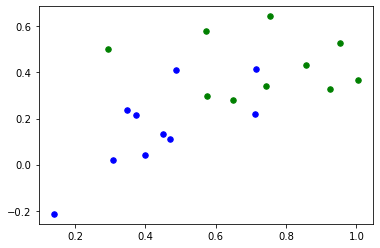

In [300]:
for i in range(10):
    plt.scatter(ema[i][0],y = ema[i][1], s = 30, c = 'g')
    plt.scatter(hma[i][0],y = hma[i][1], s = 30, c = 'b')

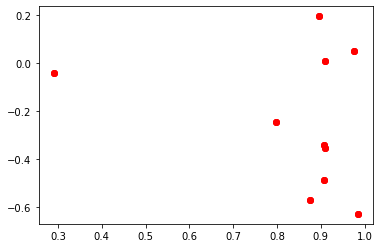

In [298]:
for i in range(10):
    plt.scatter(war,y = wma, s = 30, c = 'r')

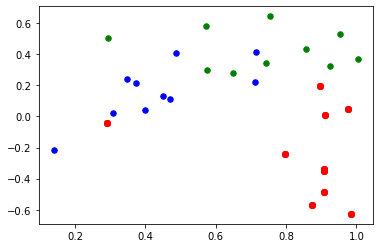

In [301]:
for i in range(10):
    plt.scatter(war,y = wma, s = 30, c = 'r')
    plt.scatter(ema[i][0],y = ema[i][1], s = 30, c = 'g')
    plt.scatter(hma[i][0],y = hma[i][1], s = 30, c = 'b')

In [414]:
from sklearn import svm
west = []
for i in range(10):
    west.append(war[i])
    west.append(wma[i])
west = np.array(west)
w_data = np.reshape(west, (10,2))

In [307]:
from sklearn import svm
west = []
for i in range(10):
    west.append(war[i])
    west.append(wma[i])
w_data = np.array(west)
w_data = np.reshape(west, (10,2))
e = np.array(ema)
h = np.array(hma)
#e_data = np.reshape(e, (20,1))
#h_data = np.reshape(h, (20,1))
#result = w_data+e+h
result = np.vstack([w_data ,e,h])

SyntaxError: invalid syntax (<ipython-input-307-ad3c4867c213>, line 1)

In [415]:
y1 = [0 for i in range(10)]
y2 = [1 for i in range(10)]
y3 = [2 for i in range(10)]
Y = y1+y2+y3
print(len(Y))
model = svm.SVC(kernel='linear', C= 3.0, gamma = 0.5)
model.fit(result,Y)

30


SVC(C=3.0, gamma=0.5, kernel='linear')

In [259]:
w_data[0]

array([ 0.69006319, -0.12809773])

In [306]:
#model.predict(np.array([0.74, 0.135]).reshape(1,-1))
predict1 = model.predict(w_data)
predict2 = model.predict(e)
predict3 = model.predict(h)
import sklearn
print(sklearn.metrics.accuracy_score(y1,predict1,normalize=True,sample_weight=None))
print(sklearn.metrics.accuracy_score(y2,predict2,normalize=True,sample_weight=None))
print(sklearn.metrics.accuracy_score(y3,predict3,normalize=True,sample_weight=None))

0.7
0.7
0.9


In [311]:
enf = sio.loadmat('./enf-add-final/ENFs_KDD.mat')
value = enf['ENFs']
name = []
data = []
for i in range(60):
    lo = ''.join(value[i][0])
    da = np.reshape(value[i][1],(600,1))
    s = lo.split('/')[-1]
    p = s.split('_')[1]
    name.append(p)
    data.append(da)
data=np.array(data)
val = data.reshape(60,600)

In [324]:
western = np.vstack([val[0],val[7],val[8],val[9],val[33],val[37],val[38]])
west = western.flatten()
n = len(west)
print(n)

4200


In [373]:
western = np.vstack([val[0],val[7],val[8],val[9],val[33],val[37],val[38]])
west = western.flatten()
n = len(west)
m = int(n/5)
war = []
wma = []
for i in range(5):
    data = west[:m]
    re = ARIMA(data, order=[1,0,1])
    re_fit = re.fit()
    r_ar = re_fit.arparams
    r_ma = re_fit.maparams
    war.append(r_ar)
    wma.append(r_ma)
    west = west[m:]
print(war)
print(wma)

[array([0.9057663]), array([0.99104931]), array([0.97159304]), array([0.8696264]), array([0.94369796])]
[array([0.08180042]), array([-0.32351989]), array([-0.508627]), array([-0.31336269]), array([-0.5862129])]


In [319]:
western = np.vstack([val[0],val[7],val[8],val[9],val[33],val[37],val[38]])
west = western.flatten()
n = len(west)
m = int(n/100)
war = []
wma = []
for i in range(100):
    try:
        data = west[:m]
        re = ARIMA(data, order=[1,0,1])
        re_fit = re.fit()
        r_ar = re_fit.arparams
        r_ma = re_fit.maparams
        war.append(r_ar)
        wma.append(r_ma)
        west = west[m:]
    except:
        pass
print(war)
print(wma)

[array([0.59187152]), array([0.86551415]), array([0.87858513]), array([0.80501469]), array([0.67724592]), array([0.68464361]), array([0.78922386]), array([0.70926589]), array([0.87694726]), array([0.79752656]), array([0.63416651]), array([0.91518971]), array([0.8430223]), array([0.21866457]), array([0.52279107])]
[array([0.26827432]), array([0.2717711]), array([0.22985734]), array([0.23164224]), array([0.52794821]), array([-0.32202331]), array([0.23536896]), array([-0.04796763]), array([0.19193298]), array([0.04635481]), array([0.39947863]), array([0.00717173]), array([0.01080238]), array([0.51966275]), array([0.13015692])]


In [335]:
len(war)

100

In [375]:
eastern = val[1]+val[2]+val[3]+val[4]+val[5]+val[6]+val[10]+val[11]+val[12]+val[13]+val[14]+val[15]+val[18]+val[19]+val[20]+val[21]+val[22]+val[23]+val[24]+val[25]+val[26]+val[27]+val[28]+val[29]+val[30]+val[31]+val[32]+val[34]+val[35]+val[36]+val[39]+val[40]+val[41]+val[42]+val[43]+val[44]+val[45]+val[46]+val[47]+val[48]+val[49]+val[50]+val[51]+val[52]+val[53]+val[54]+val[55]+val[56]+val[57]+val[58]+val[59]
east = eastern.flatten()
n = len(east)
m = int(n/5)
ear = []
ema = []
for i in range(5):
    data = east[:m]
    re = ARIMA(data, order=[1,0,1])
    re_fit = re.fit()
    r_ar = re_fit.arparams
    r_ma = re_fit.maparams
    ear.append(r_ar)
    ema.append(r_ma)
    east = east[m:]
print(ear)
print(ema)

[array([0.94527823]), array([0.94786437]), array([0.9612732]), array([0.95416036]), array([0.89864235])]
[array([-0.36106306]), array([-0.226795]), array([-0.40377538]), array([-0.27730044]), array([-0.33153685])]


In [377]:
hawaii = val[16]+val[17]
hawa = hawaii.flatten()
n = len(hawa)
m = int(n/5)
har = []
hma = []
for i in range(5):
    data = hawa[:m]
    re = ARIMA(data, order=[1,0,1])
    re_fit = re.fit()
    r_ar = re_fit.arparams
    r_ma = re_fit.maparams
    har.append(r_ar)
    hma.append(r_ma)
    hawa = hawa[m:]
print(har)
print(hma)

[array([-0.26486337]), array([0.87379186]), array([0.25025908]), array([0.92094842]), array([0.69950822])]
[array([0.55368003]), array([-0.59877286]), array([0.20778983]), array([-0.57394787]), array([-0.13045241])]


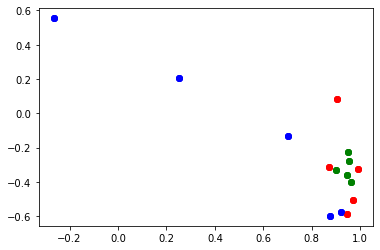

In [378]:
for i in range(10):
    plt.scatter(war,y = wma, s = 30, c = 'r')
    plt.scatter(ear,y = ema, s = 30, c = 'g')
    plt.scatter(har,y = hma, s = 30, c = 'b')

In [416]:
from sklearn import svm
west = []
for i in range(10):
    west.append(war[i])
    west.append(wma[i])
w_data = np.array(west)
w_data = np.reshape(west, (10,2))
e = np.array(ema)
h = np.array(hma)
#e_data = np.reshape(e, (20,1))
#h_data = np.reshape(h, (20,1))
#result = w_data+e+h
result = np.vstack([w_data ,e,h])
y1 = [0 for i in range(10)]
y2 = [1 for i in range(10)]
y3 = [2 for i in range(10)]
Y = y1+y2+y3
print(len(Y))
model = svm.SVC(kernel='linear', C= 3.0, gamma = 0.5)
model.fit(result,Y)
predict1 = model.predict(w_data)
predict2 = model.predict(e)
predict3 = model.predict(h)
import sklearn
print(sklearn.metrics.accuracy_score(y1,predict1,normalize=True,sample_weight=None))
print(sklearn.metrics.accuracy_score(y2,predict2,normalize=True,sample_weight=None))
print(sklearn.metrics.accuracy_score(y3,predict3,normalize=True,sample_weight=None))

30
0.8
0.7
0.9


In [428]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=3)
con = np.reshape(result,(-1, 1))
Y1 = [0 for i in range(20)]
Y2 = [1 for i in range(20)]
Y3 = [2 for i in range(20)]
YY = y1+y2+y3
classifier.fit(con, YY)
unknown1 = np.reshape(w_data,(-1, 1))
unknown2 = np.reshape(e,(-1, 1))
unknown3 = np.reshape(h,(-1, 1))
guesses1 = classifier.predict(unknown1)
guesses2 = classifier.predict(unknown2)
guesses3 = classifier.predict(unknown3)
import sklearn
print(sklearn.metrics.accuracy_score(Y1,guesses1,normalize=True,sample_weight=None))
print(sklearn.metrics.accuracy_score(Y2,guesses2,normalize=True,sample_weight=None))
print(sklearn.metrics.accuracy_score(Y3,guesses3,normalize=True,sample_weight=None))

0.75
0.75
0.85


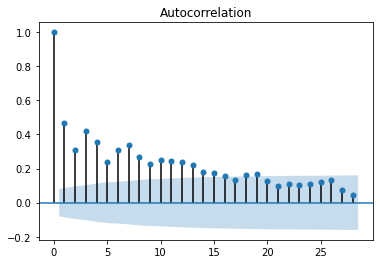

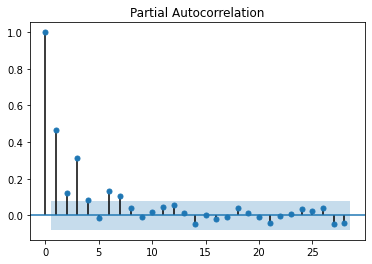

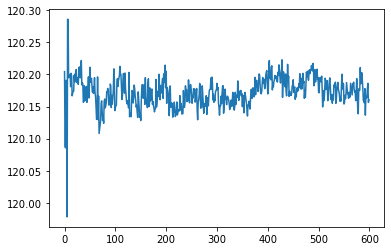

In [148]:
hawa = val[16]+val[17]
plot_acf(hawa)
plot_pacf(hawa)
plt.show()

plt.plot(hawa)
plt.show()

In [420]:
print(con.shape)
print(training_labels.shape)

(60, 1)


AttributeError: 'list' object has no attribute 'shape'

In [423]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=3)
con = np.reshape(result,(-1, 1))
classifier.fit(con, Y*2)
unknown = np.reshape(w_data,(-1, 1))
guesses = classifier.predict(unknown)

In [426]:
print(guesses)

[0 2 0 2 0 2 1 0 0 0 0 0 0 0 1 0 0 0 0 0]


In [388]:
from sklearn.mixture import GaussianMixture
#train_data, test_data, train_label, test_label =  train_test_split(total_data, total_label, test_size=0.30, random_state=42)

classifier = GaussianMixture(n_components = 1,covariance_type='diag',max_iter=100,random_state = 42,tol=0.1,n_init = 1)

classifier.means_init = np.array([w_data[y1].mean(axis=0)]) 
classifier.fit(w_data)

pred_lab_train = classifier.predict(w_data)
#train_accuracy = np.mean(pred_lab_train.ravel() == train_label.ravel())*100

pred_lab_test = classifier.predict(w_data)
#test_accuracy = np.mean(pred_lab_test.ravel()==test_label.ravel())*100

In [367]:
from sklearn.mixture import GaussianMixture
#train_data, test_data, train_label, test_label =  train_test_split(total_data, total_label, test_size=0.30, random_state=42)

classifier = GaussianMixture(n_components = 1,covariance_type='diag',max_iter=100,random_state = 42,tol=0.1,n_init = 1)

classifier.means_init = np.array([e[y2].mean(axis=0)]) 
classifier.fit(e)

pred_lab_train = classifier.predict(e)
#train_accuracy = np.mean(pred_lab_train.ravel() == train_label.ravel())*100

pred_lab_test = classifier.predict(e)
#test_accuracy = np.mean(pred_lab_test.ravel()==test_label.ravel())*100

In [368]:
pred_lab_train

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [5]:
t1 = sio.loadmat('../data_20180428/[Texas]1.mat')
tv1 = t1['VALUE']
t2 = sio.loadmat('../data_20180428/[Texas]2.mat')
tv2 = t2['VALUE']
texas = np.vstack([tv1 ,tv2])

t_ar = []
t_ma = []
n = len(texas)
m = int(n/10)
for i in range(10):
    data = texas[:m]
    t = ARIMA(data, order=[1,0,1])
    t_fit = t.fit()
    tar = t_fit.arparams
    tma = t_fit.maparams
    t_ar.append(tar)
    t_ma.append(tma)
    texas = texas[m:]

In [6]:
print(t_ar)
print(t_ma)

[array([0.8892855]), array([0.89477078]), array([0.90237842]), array([0.89168537]), array([0.89693221]), array([0.88991727]), array([0.89440865]), array([0.90179364]), array([0.89267059]), array([0.89445696])]
[array([-0.18769771]), array([-0.20266868]), array([-0.17728538]), array([-0.1382874]), array([-0.18356293]), array([-0.18885411]), array([-0.20344065]), array([-0.17560624]), array([-0.1383556]), array([-0.17318224])]


In [ ]:
westall = np.empty
for i in range(1,20):
    w = sio.loadmat('../data_20180428/[West]'+repr(i)+'.mat')
    wv = w['VALUE']
    westall = np.append(westall ,wv)
westall = np.delete(westall, [0, 0], axis=0)
westall=np.expand_dims(westall, axis=1)

w_ar = []
w_ma = []
n = len(westall)
m = int(n/10)
for i in range(10):
    data = westall[:m]
    we = ARIMA(data, order=[1,0,1])
    w_fit = we.fit()
    war = w_fit.arparams
    wma = w_fit.maparams
    w_ar.append(war)
    w_ma.append(wma)
    westall = westall[m:]

In [11]:
eastall = np.empty
for i in range(1,53):
    e = sio.loadmat('../data_20180428/[East]'+repr(i)+'.mat')
    ev = e['VALUE']
    eastall = np.append(eastall ,ev)
eastall = np.delete(eastall, [0, 0], axis=0)
eastall=np.expand_dims(eastall, axis=1)
print(eastall.shape)

e_ar = []
e_ma = []
n = len(eastall)
m = int(n/10)
for i in range(10):
    data = eastall[:m]
    ea = ARIMA(data, order=[1,0,1])
    e_fit = ea.fit()
    ear = e_fit.arparams
    ema = e_fit.maparams
    e_ar.append(ear)
    e_ma.append(ema)
    eastall = eastall[m:]

(14077440, 1)


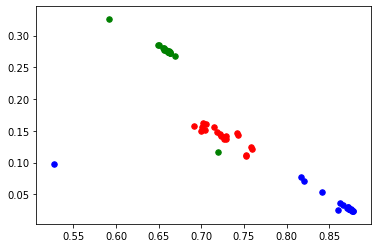

In [12]:
for i in range(10):
    plt.scatter(t_ar,y = t_ma, s = 30, c = 'r')
    plt.scatter(w_ar,y = w_ma, s = 30, c = 'g')
    plt.scatter(e_ar,y = e_ma, s = 30, c = 'b')